In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:05<00:00, 158MB/s]
100% 1.06G/1.06G [00:05<00:00, 219MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validaton_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# this is stored in 0-255 in numpy array, we have to reduce from 0-1, means normalizstion
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validaton_ds = validaton_ds.map(process)


In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=10, validation_data=validaton_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9891 - loss: 0.0319 - val_accuracy: 0.7950 - val_loss: 1.2614
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.9925 - loss: 0.0220 - val_accuracy: 0.7896 - val_loss: 1.2055
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.9925 - loss: 0.0229 - val_accuracy: 0.7960 - val_loss: 1.3244
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9936 - loss: 0.0253 - val_accuracy: 0.7966 - val_loss: 1.3494
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 79ms/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.8004 - val_loss: 1.3642
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.7882 - val_loss: 1.2636
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.9953 - loss: 0.0138 - val_accuracy: 0.7918 - val_loss: 1.2952
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9946 - loss: 0.0204 - 

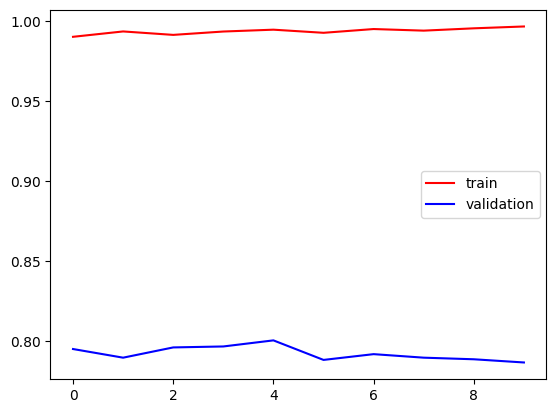

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

model = Sequential()

# Conv block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Global pooling instead of flatten
model.add(GlobalAveragePooling2D())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
history1 = model.fit(train_ds, epochs=10, validation_data=validaton_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 91ms/step - accuracy: 0.5720 - loss: 0.6821 - val_accuracy: 0.6070 - val_loss: 0.6651
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.6317 - loss: 0.6331 - val_accuracy: 0.6562 - val_loss: 0.6127
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 84ms/step - accuracy: 0.6880 - loss: 0.5858 - val_accuracy: 0.6428 - val_loss: 0.6199
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7157 - loss: 0.5557 - val_accuracy: 0.6752 - val_loss: 0.6031
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.7394 - loss: 0.5276 - val_accuracy: 0.7212 - val_loss: 0.5721
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7614 - loss: 0.5003 - val_accuracy: 0.7658 - val_loss: 0.4902
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 91ms/step - accuracy: 0.7745 - loss: 0.4774 - val_accuracy: 0.7318 - val_loss: 0.5336
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 85ms/step - accuracy: 0.7951 - loss: 0.4460 - 

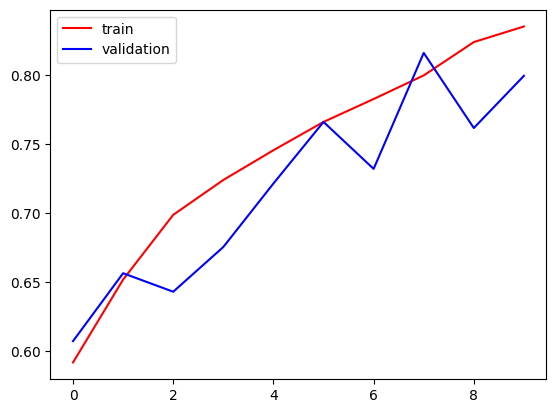

In [28]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'], color='red', label='train')
plt.plot(history1.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

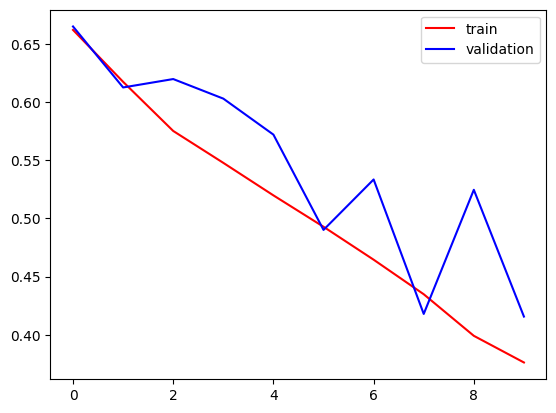

In [29]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'], color='red', label='train')
plt.plot(history1.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [18]:
#with l2

from tensorflow.keras import regularizers

model = Sequential()

# Conv block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Global pooling instead of flatten
model.add(GlobalAveragePooling2D())

# Dense layers with L2
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))

# Output
model.add(Dense(1, activation='sigmoid'))


In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
history2 = model.fit(train_ds, epochs=10, validation_data=validaton_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 88ms/step - accuracy: 0.5676 - loss: 0.8465 - val_accuracy: 0.5122 - val_loss: 0.7681
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.6394 - loss: 0.6982 - val_accuracy: 0.6036 - val_loss: 0.6856
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6886 - loss: 0.6202 - val_accuracy: 0.6810 - val_loss: 0.6202
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.7165 - loss: 0.5741 - val_accuracy: 0.5608 - val_loss: 0.7310
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7419 - loss: 0.5434 - val_accuracy: 0.5746 - val_loss: 0.9097
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.7660 - loss: 0.5060 - val_accuracy: 0.6220 - val_loss: 1.2183
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7806 - loss: 0.4807 - val_accuracy: 0.6478 - val_loss: 0.7153
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.8117 - loss: 0.4438 - 

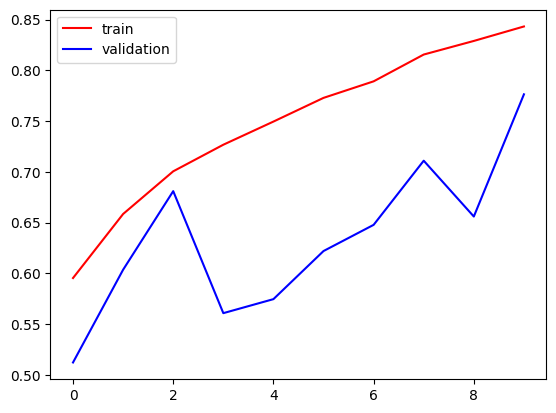

In [23]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'], color='red', label='train')
plt.plot(history2.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

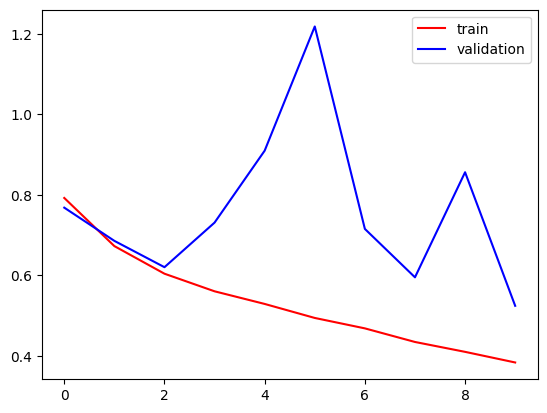

In [24]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], color='red', label='train')
plt.plot(history2.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [38]:
import cv2

In [39]:
test_img = cv2.imread('/content/cat-image.jfif')

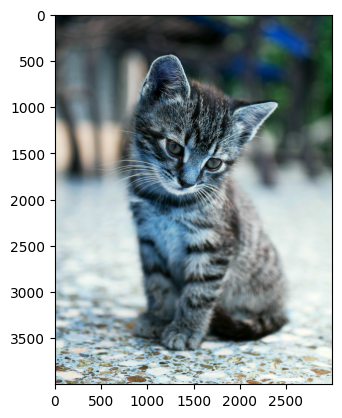

In [40]:
plt.imshow(test_img)

In [41]:
test_img.shape

(3999, 3000, 3)

In [43]:
test_image = cv2.resize(test_img, (256,256))

In [48]:


# Resize to 256x256
test_img_resized = tf.image.resize(test_img, [256, 256])

# Convert to batch format
test_input = tf.expand_dims(test_img_resized, axis=0)  # shape: (1, 256, 256, 3)


In [49]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.]], dtype=float32)